In [23]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Clave API proporcionada
api_key = 'bc4fc364-0f1e-43c9-9b3f-6530bafdca96'

# URL de la API de LiveCoinWatch
url = 'https://api.livecoinwatch.com/coins/single'

# Headers con la clave API
headers = {
    'x-api-key': api_key,
    'Content-Type': 'application/json'
}

# Parámetros de la solicitud: obtendremos datos del par Bitcoin/USD
params = {
    'currency': 'USD',
    'code': 'BTC',
    'meta': False  # Ponemos 'meta' en False para simplificar la respuesta
}

# Hacer la solicitud
try:
    response = requests.post(url, json=params, headers=headers)

    # Verificar si la solicitud fue exitosa
    if response.status_code == 200:
        data = response.json()
        print(data)  # Imprimir los datos recibidos para verificar la estructura
    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {str(e)}")


{'rate': 60099.83135517607, 'volume': 14353566100, 'cap': 1187222946659, 'liquidity': 1435241905, 'delta': {'hour': 0.9998, 'day': 0.992, 'week': 1.1076, 'month': 1.0423, 'quarter': 0.8959, 'year': 2.2547}}


Precio actual de Bitcoin (BTC/USD): 60092.70472578338


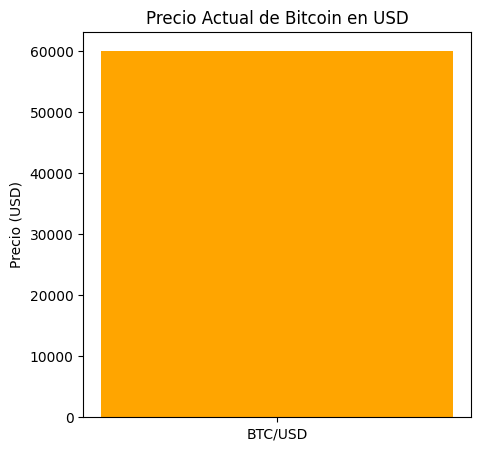

In [19]:
# Suponiendo que 'rate' es el precio de Bitcoin en USD
if 'rate' in data:
    price_btc_usd = data['rate']
    print(f"Precio actual de Bitcoin (BTC/USD): {price_btc_usd}")

# Visualización sencilla
plt.figure(figsize=(5, 5))
plt.bar(['BTC/USD'], [price_btc_usd], color='orange')
plt.title('Precio Actual de Bitcoin en USD')
plt.ylabel('Precio (USD)')
plt.show()


2024-09-14 19:09:06.417802 - Precio de Bitcoin: 60092.70472578338
2024-09-14 19:09:09.922333 - Precio de Bitcoin: 60092.704725370175
2024-09-14 19:09:13.366784 - Precio de Bitcoin: 60092.704725370175
2024-09-14 19:09:16.856790 - Precio de Bitcoin: 60092.704725370175
2024-09-14 19:09:20.349344 - Precio de Bitcoin: 60092.699289917065
2024-09-14 19:09:23.840865 - Precio de Bitcoin: 60094.705629276534
2024-09-14 19:09:27.328250 - Precio de Bitcoin: 60094.705629276534
2024-09-14 19:09:30.769878 - Precio de Bitcoin: 60094.705629276534
2024-09-14 19:09:34.181410 - Precio de Bitcoin: 60099.555966798456
2024-09-14 19:09:37.630499 - Precio de Bitcoin: 60099.555966798456
2024-09-14 19:09:42.026363 - Precio de Bitcoin: 60100.124296773894
2024-09-14 19:09:45.469928 - Precio de Bitcoin: 60100.124296773894
2024-09-14 19:09:48.929464 - Precio de Bitcoin: 60101.0727855683
2024-09-14 19:09:52.380539 - Precio de Bitcoin: 60101.0727855683
2024-09-14 19:09:57.646469 - Precio de Bitcoin: 60106.22245990588
2

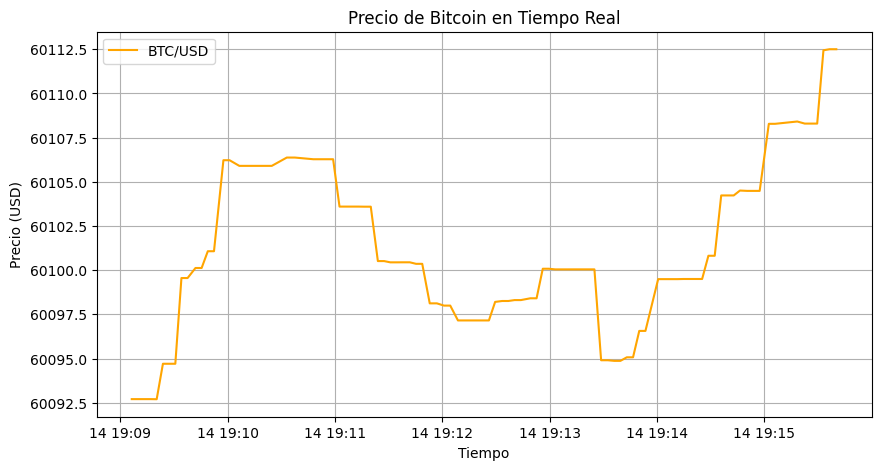

In [20]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt

# Clave API proporcionada
api_key = 'bc4fc364-0f1e-43c9-9b3f-6530bafdca96'

# URL de la API de LiveCoinWatch
url = 'https://api.livecoinwatch.com/coins/single'

# Headers con la clave API
headers = {
    'x-api-key': api_key,
    'Content-Type': 'application/json'
}

# Parámetros para obtener el precio de Bitcoin
params = {
    'currency': 'USD',
    'code': 'BTC',
    'meta': False
}

# Crear una lista vacía para almacenar los datos
data_list = []

# Especifica cuántos precios quieres capturar y cada cuánto tiempo (en segundos)
num_points = 100  # Cantidad de precios que deseas capturar
interval = 3  # Intervalo de tiempo en segundos (ej. 60 segundos = 1 minuto)

# Capturar precios en el tiempo
for i in range(num_points):
    try:
        response = requests.post(url, json=params, headers=headers)

        if response.status_code == 200:
            data = response.json()
            price_btc_usd = data['rate']
            timestamp = pd.Timestamp.now()  # Obtener la fecha y hora actual
            print(f"{timestamp} - Precio de Bitcoin: {price_btc_usd}")

            # Agregar los datos a la lista
            data_list.append([timestamp, price_btc_usd])
            
            # Pausar por el intervalo de tiempo especificado
            time.sleep(interval)

        else:
            print(f"Error: {response.status_code} - {response.text}")
    
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        break

# Convertir la lista en un DataFrame de pandas
df = pd.DataFrame(data_list, columns=['Timestamp', 'Price'])
print(df.head())  # Mostrar las primeras filas para verificar

# Guardar los datos en un archivo CSV si deseas mantener un registro
#df.to_csv('btc_prices.csv', index=False)

# Visualizar los datos de precios en el tiempo
plt.figure(figsize=(10,5))
plt.plot(df['Timestamp'], df['Price'], label='BTC/USD', color='orange')
plt.title('Precio de Bitcoin en Tiempo Real')
plt.xlabel('Tiempo')
plt.ylabel('Precio (USD)')
plt.grid(True)
plt.legend()
plt.show()


In [21]:
# Calcular la media, desviación estándar y otros estadísticos
mean_price = df['Price'].mean()
std_price = df['Price'].std()

print(f"Precio promedio de Bitcoin: {mean_price}")
print(f"Desviación estándar: {std_price}")


Precio promedio de Bitcoin: 60100.89625949204
Desviación estándar: 4.581814095113827


Predicción de precios: 100    60112.778196
101    60112.976167
102    60112.997332
103    60113.034691
104    60113.062434
105    60113.076171
106    60113.081892
107    60113.086746
108    60113.089415
109    60113.090848
Name: predicted_mean, dtype: float64


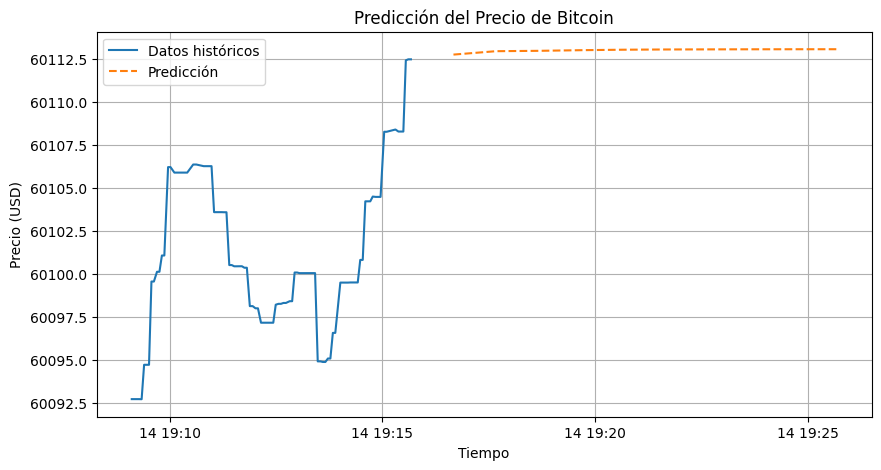

In [22]:
from statsmodels.tsa.arima.model import ARIMA

# Crear un modelo ARIMA
model = ARIMA(df['Price'], order=(5, 1, 0))  # Ajustar los parámetros (p, d, q)
model_fit = model.fit()

# Predecir los próximos 10 intervalos
forecast = model_fit.forecast(steps=10)
print(f"Predicción de precios: {forecast}")

# Visualizar la predicción
plt.figure(figsize=(10,5))
plt.plot(df['Timestamp'], df['Price'], label='Datos históricos')
plt.plot(pd.date_range(df['Timestamp'].iloc[-1], periods=11, freq='min')[1:], forecast, label='Predicción', linestyle='--')
plt.xlabel('Tiempo')
plt.ylabel('Precio (USD)')
plt.title('Predicción del Precio de Bitcoin')
plt.legend()
plt.grid(True)
plt.show()
